<a href="https://colab.research.google.com/github/alejomagri/SANDBOX/blob/main/Vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD EAN**


GUIA 1 - ESPECIALIZACION EN MACHINE LEARNING

ACTIVIDAD 2

* Por: Sebastian Alejandro Magri Gordillo


Propósito de aprendizaje

Plantear dos modelos para evaluar la calidad de las variedades rojas del vino portugués “Vinho Verde” según características físico-químicas. El estudiante lo hará a través de una regresión lineal y otra logística y usando la base de datos winequality-red.csv

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [36]:
df_vinos = pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')
df_vinos

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [37]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [38]:
df_vinos.color.value_counts()

color
white    4898
red      1599
Name: count, dtype: int64

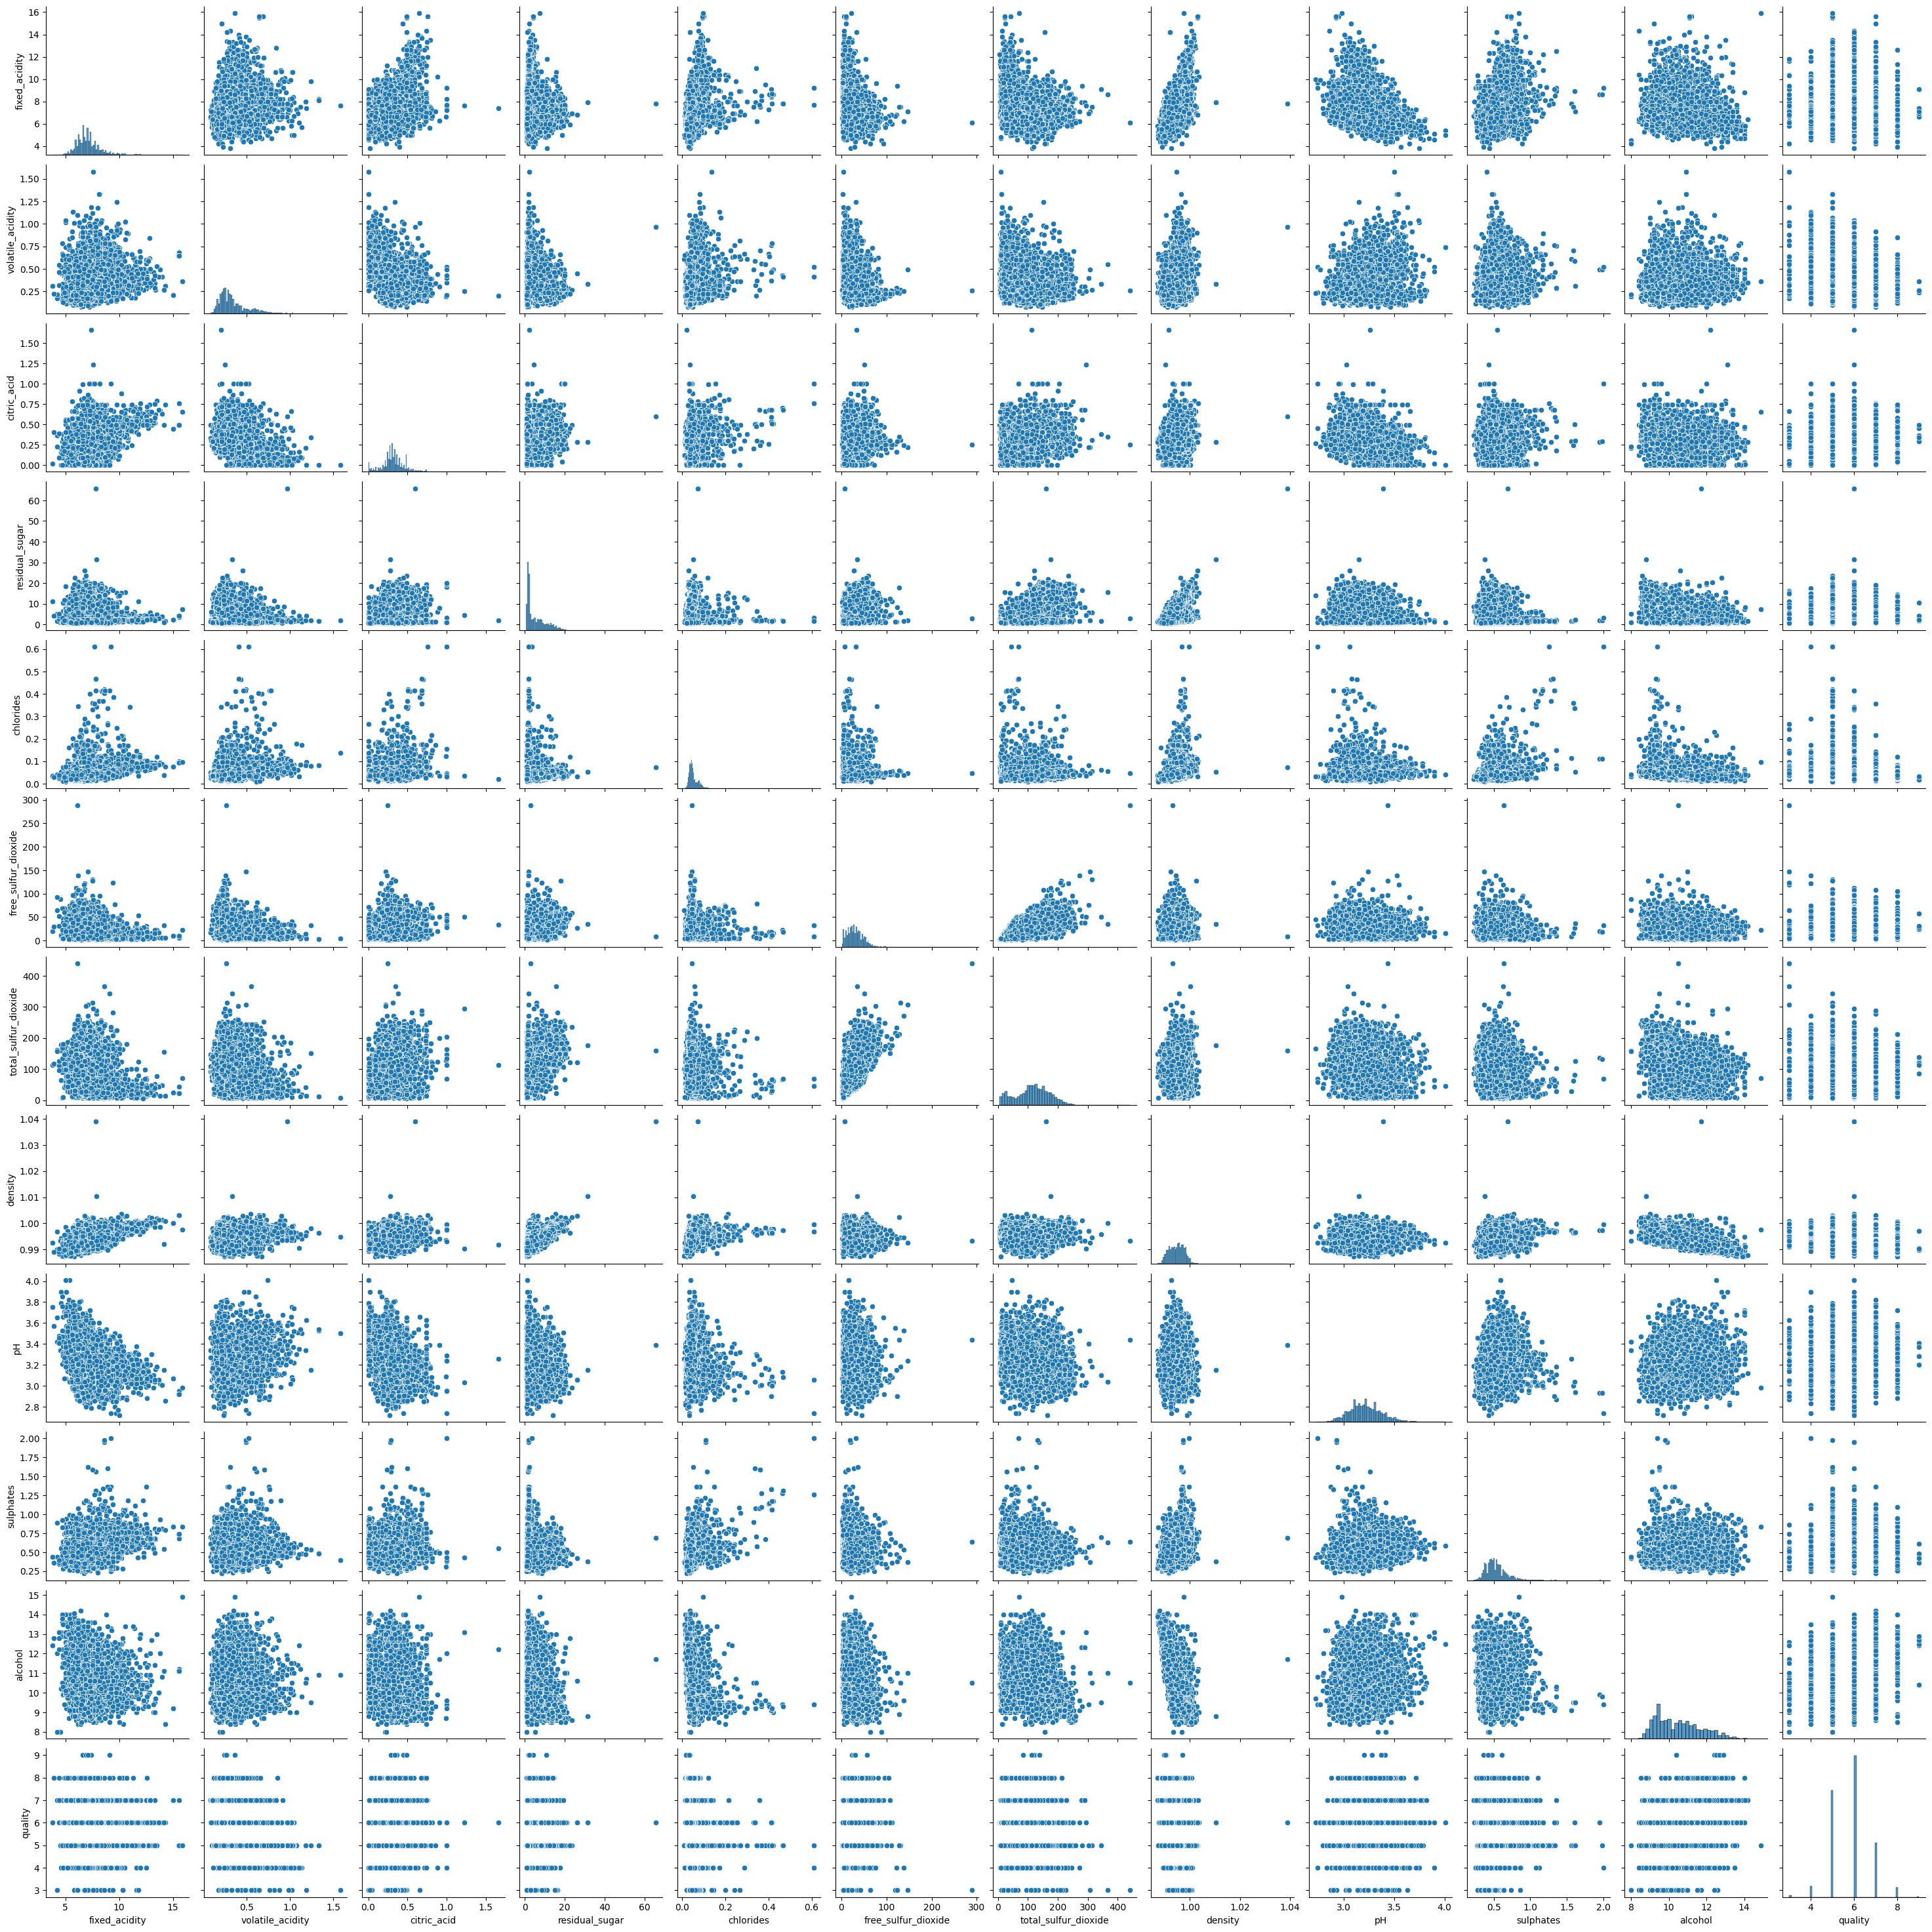

In [30]:
sns.pairplot(df_vinos)

In [42]:
X = df_vinos[['citric_acid']]
y = df_vinos['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [48]:
print("\nvisualizando el comportamiento entre el Ph y la concentracion del acido citrico:")
print(" de los datos  de X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())



visualizando el comportamiento entre el Ph y la concentracion del acido citrico:
 de los datos  de X_train:
      citric_acid
5372         0.12
1790         0.40
5879         0.20
1065         0.18
852          0.32

X_test:
      citric_acid
5316         0.24
5210         0.18
3518         0.50
1622         0.14
2443         0.29

y_train:
5372    3.26
1790    2.93
5879    3.22
1065    3.29
852     3.22
Name: pH, dtype: float64

y_test:
5316    3.11
5210    3.27
3518    3.24
1622    3.05
2443    3.30
Name: pH, dtype: float64


se utiliza un primer modelo el de regresion lineal

In [46]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

se visualizan los datos de la relacion entre el pH y el acido citrico

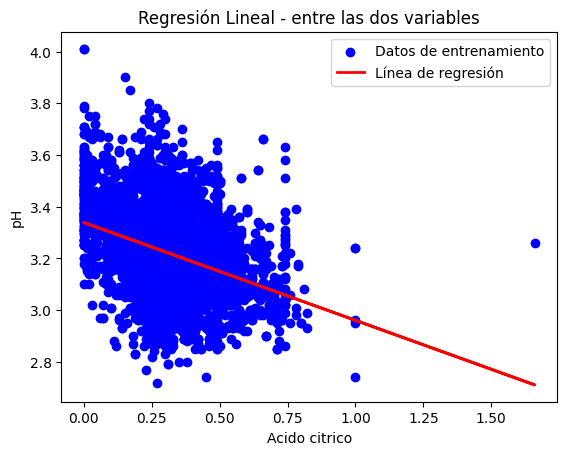

In [50]:
import matplotlib.pyplot as plt

# Graficar la línea de regresión sobre los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Acido citrico')
plt.ylabel('pH')
plt.legend()
plt.title('Regresión Lineal - entre las dos variables')
plt.show()
